# K-means Clustering

### Import resources and display image

D:\workspace\CVND_Exercises-master\CVND_Exercises-master\1_3_Types_of_Features_Image_Segmentation/images
1 : city_hall_zoom.png
2 : flamingos.jpg
3 : monarch.jpg
4 : oranges.jpg
5 : pancakes.jpg
6 : pizza_bluescreen.jpg
7 : rainbow_icon.png
8 : thumbs_up_down.jpg
9 : waffle.jpg


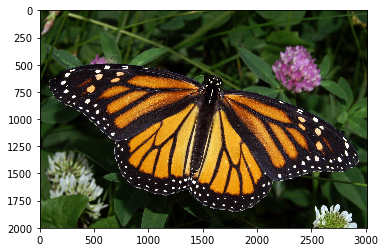

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
path = os.getcwd()
image_path = path + '/images'
print(image_path)
image_list = os.listdir(image_path)
for i, image in enumerate(image_list):
    print(i+1,':',image)

# And select one!
image = cv2.imread('images/monarch.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)


### Prepare data for k-means

In [44]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
print(image.shape) # 2000,3008,3
pixel_vals = image.reshape((-1,3))
print(pixel_vals.shape) # 6016000,3

# Convert to float type
pixel_vals = np.float32(pixel_vals) # cv2.kmeans 의 입력 type

(2000, 3008, 3)
(6016000, 3)


### Implement k-means clustering

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]] (6016000, 1)
[1 1 1 ... 0 0 0]
-----------
[[ 20  23  12]
 [ 62  74  37]
 [204 153  80]]
-----------
[[62 74 37]
 [62 74 37]
 [62 74 37]
 ...
 [20 23 12]
 [20 23 12]
 [20 23 12]] (6016000, 3)
(2000, 3008, 3)
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


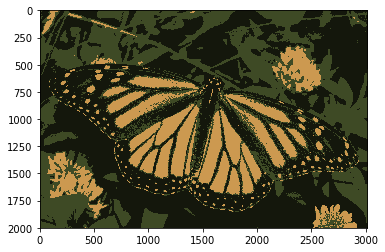

In [55]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) #(type, max_iter, epsilon) #10, 1.0
# type에는 3가지 종류가 있다
# cv2.TERM_CRITERIA_EPS : 지정된 eps(정확도)에 도달하면 알고리즘 반복 중지
#                       : eps란 cluster가 한번에 이동하는 거리로 봐도 되는데 eps보다 cluster가 적게 이동하면 중지하겠단 의미
# cv2.TERM_CRITERIA_MAX_ITER : 지정된 반복횟수가 지난 후 알고리즘 반복 중지
# cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER : 둘 중 하나가 충족되면 반복 중지


## TODO: Select a value for k
# then perform k-means clustering
k = 3 #2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#       label, center pt            (samples, num of cluster, label, 반복 종료 기준, num of attempts, 초기 중점 위치)


# convert data into 8-bit values 이미지로 변환하기 위한 작업
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
print(labels, labels.shape) #labels : 각 픽셀의 라벨 , (6016000,1)
print(labels.flatten()) #(6016000,1) -> 길이 6016000인 리스트로 변환
print('-----------')
print(centers) # k=3이므로 3개의 센터 생성 [[ 62  74  38],[204 153  80],[ 20  24  12]]
print('-----------')
print(segmented_data, segmented_data.shape)

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
print(segmented_image.shape)
labels_reshape = labels.reshape(image.shape[0], image.shape[1])
print(labels_reshape)
plt.imshow(segmented_image)

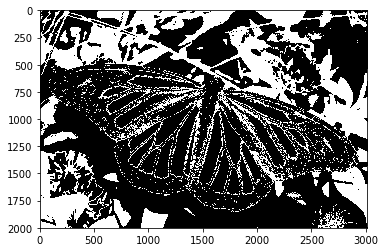

In [60]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==1, cmap='gray')

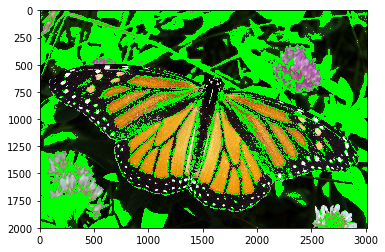

In [61]:
# mask an image segment by cluster

cluster = 1 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)